#  Importing Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading the Dataset

In [ ]:
# df = pd.read_csv("train.csv")

In [ ]:
#df2 = pd.read_csv("train.csv")

In [ ]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')


In [11]:
# Specify the path to test and train file in Google Drive
file_path_train = '/content/train.csv'
file_path_test = '/content/test.csv'

In [12]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path_train)
df2 = pd.read_csv(file_path_test)

#Data Exploration and Understanding

In [13]:
df.shape

(35827, 25)

In [14]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,35827.000000,35827.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35826.000000,35721.000000
mean,17913.000000,64870.468529,39.250154,1186.930497,2.732429,3.056998,2.751912,2.963630,3.201837,3.248060,3.436247,3.359488,3.384888,3.348239,3.634400,3.314995,3.644113,3.287417,14.827890,15.215895
std,10342.508384,37407.564141,15.116639,995.663891,1.331932,1.531175,1.399202,1.285222,1.333863,1.352225,1.320713,1.331136,1.285398,1.311726,1.179345,1.261954,1.174638,1.316888,37.421171,38.031951
min,0.000000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8956.500000,32492.000000,27.000000,409.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,17913.000000,64791.000000,40.000000,838.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,26869.500000,97266.000000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,35826.000000,129878.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


There are almost 104K entries of passengers in the dataset #summary of the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35827 entries, 0 to 35826
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         35827 non-null  int64  
 1   id                                 35827 non-null  int64  
 2   Gender                             35827 non-null  object 
 3   Customer Type                      35827 non-null  object 
 4   Age                                35826 non-null  float64
 5   Type of Travel                     35826 non-null  object 
 6   Class                              35826 non-null  object 
 7   Flight Distance                    35826 non-null  float64
 8   Inflight wifi service              35826 non-null  float64
 9   Departure/Arrival time convenient  35826 non-null  float64
 10  Ease of Online booking             35826 non-null  float64
 11  Gate location                      35826 non-null  flo

We can drop unnamed and id columns because they won't help us for factor analysis,
When axis=1, it indicates that the operation should be applied along columns.

In [16]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [17]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [18]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')

In [19]:
#now the info of data is looke like this
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35827 entries, 0 to 35826
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             35827 non-null  category
 1   Customer Type                      35827 non-null  category
 2   Age                                35826 non-null  float64 
 3   Type of Travel                     35826 non-null  category
 4   Class                              35826 non-null  category
 5   Flight Distance                    35826 non-null  float64 
 6   Inflight wifi service              35826 non-null  category
 7   Departure/Arrival time convenient  35826 non-null  category
 8   Ease of Online booking             35826 non-null  category
 9   Gate location                      35826 non-null  category
 10  Food and drink                     35826 non-null  category
 11  Online boarding                    35826 

#Data Cleaning and Preprocessing
Checking if there are any null values(columns) in our data

> Indented block



In [20]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    1
Type of Travel                         1
Class                                  1
Flight Distance                        1
Inflight wifi service                  1
Departure/Arrival time convenient      1
Ease of Online booking                 1
Gate location                          1
Food and drink                         1
Online boarding                        1
Seat comfort                           1
Inflight entertainment                 1
On-board service                       1
Leg room service                       1
Baggage handling                       1
Checkin service                        1
Inflight service                       1
Cleanliness                            1
Departure Delay in Minutes             1
Arrival Delay in Minutes             106
satisfaction                           1
dtype: int64

Only in the arrival delay column there are a few null values so let's handle them first with the median of that column

In [21]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  1
Type of Travel                       1
Class                                1
Flight Distance                      1
Inflight wifi service                1
Departure/Arrival time convenient    1
Ease of Online booking               1
Gate location                        1
Food and drink                       1
Online boarding                      1
Seat comfort                         1
Inflight entertainment               1
On-board service                     1
Leg room service                     1
Baggage handling                     1
Checkin service                      1
Inflight service                     1
Cleanliness                          1
Departure Delay in Minutes           1
Arrival Delay in Minutes             0
satisfaction                         1
dtype: int64

# Now some Visualization of our Dataset

In [22]:
df.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,35827,35827,35826,35826,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0,35826.0
unique,2,3,2,3,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0
top,Female,Loyal Customer,Business travel,Business,2.0,4.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
freq,18253,29290,24702,17128,8948.0,8782.0,8373.0,9672.0,8473.0,10725.0,11091.0,10260.0,10714.0,9818.0,12922.0,9999.0,13122.0,9447.0


Here for categorical feature, total no. of values, the no. of unique values, the most frequently occurring element and the total no. of elements are given.

#Visualization
Lets check the Distribution of our target value


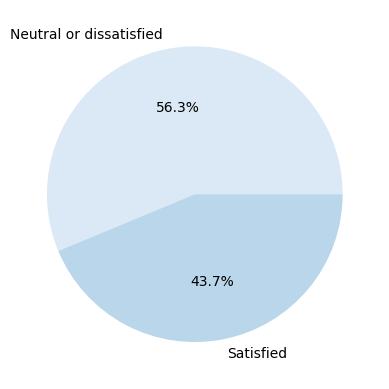

In [23]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"],
        colors = sns.color_palette("Blues"), autopct = '%1.1f%%')
pass

The Values of our target class amost equal

# A) Non-Categorical Data

In [24]:
corr_mat = df.corr()
corr_mat.style.background_gradient(cmap='BuGn')

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.091051,-0.010704,-0.011044
Flight Distance,0.091051,1.000000,0.002507,-0.002313
Departure Delay in Minutes,-0.010704,0.002507,1.000000,0.961727
Arrival Delay in Minutes,-0.011044,-0.002313,0.961727,1.000000


Here we can observe that there is a strong correlation between the  the two features 'Departure delay in minutes' and 'Arrival delay in minutes'. The value of correlation coefficient reaches the following value:

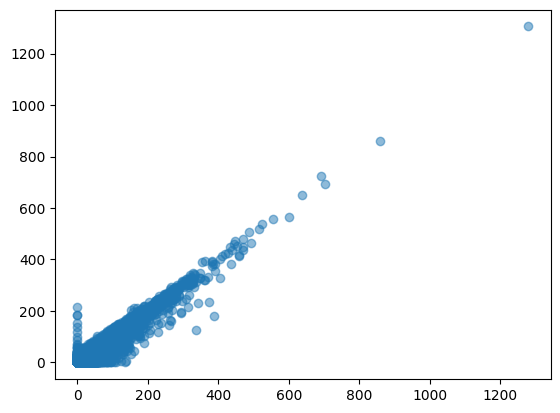

In [25]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.5)
pass

We knew that if a flight departs late then it will arrive late at destination. So that is the reason for linear dependance between these two variables

### Age of Passengers

Text(0, 0.5, 'Passengers')

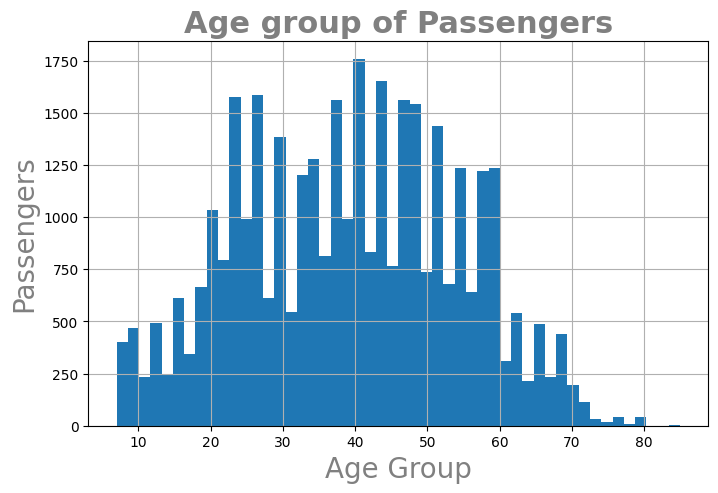

In [26]:
plt.figure(figsize=(8, 5))

df['Age'].hist(bins=50)

plt.title("Age group of Passengers", weight="bold", size="22", color='#808080')
plt.xlabel("Age Group", size="20", color='#808080')
plt.ylabel("Passengers", size="20", color='#808080')

### Flight Distance

Text(0, 0.5, 'No. of Flights')

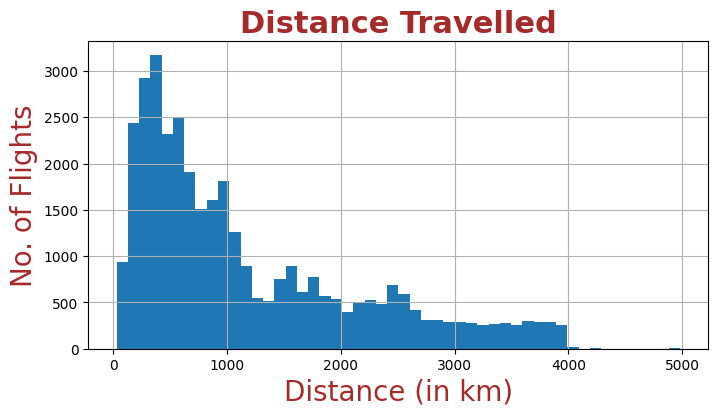

In [27]:
plt.figure(figsize=(8, 4))

df['Flight Distance'].hist(bins=50)

plt.title("Distance Travelled", weight="bold", size="22", color='#A52A2A')
plt.xlabel("Distance (in km)", size="20", color='#A52A2A')
plt.ylabel("No. of Flights", size="20", color='#A52A2A')

#Removing the outliers in departure delay.

In [28]:
df.drop(df[df['Departure Delay in Minutes'] > 250].index, inplace = True)

Text(0, 0.5, 'Flights')

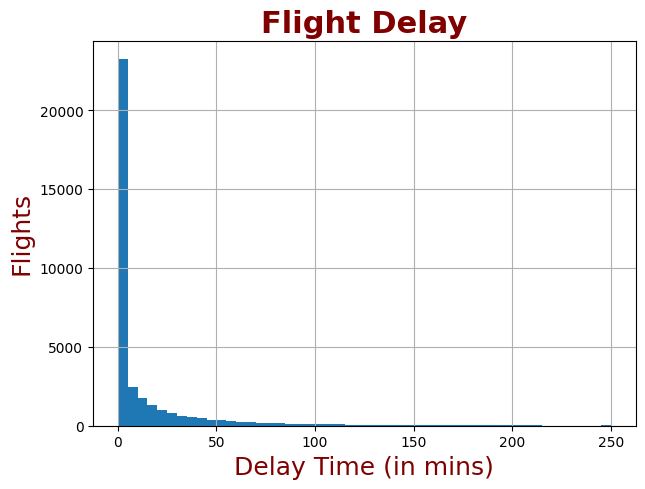

In [29]:
plt.figure(figsize=(7, 5))

df['Departure Delay in Minutes'].hist(bins=50)

plt.title("Flight Delay", weight="bold", size="22", color='#800000')
plt.xlabel("Delay Time (in mins)", size="18", color='#800000')
plt.ylabel("Flights", size="18", color='#800000')

# B) Categorical Data

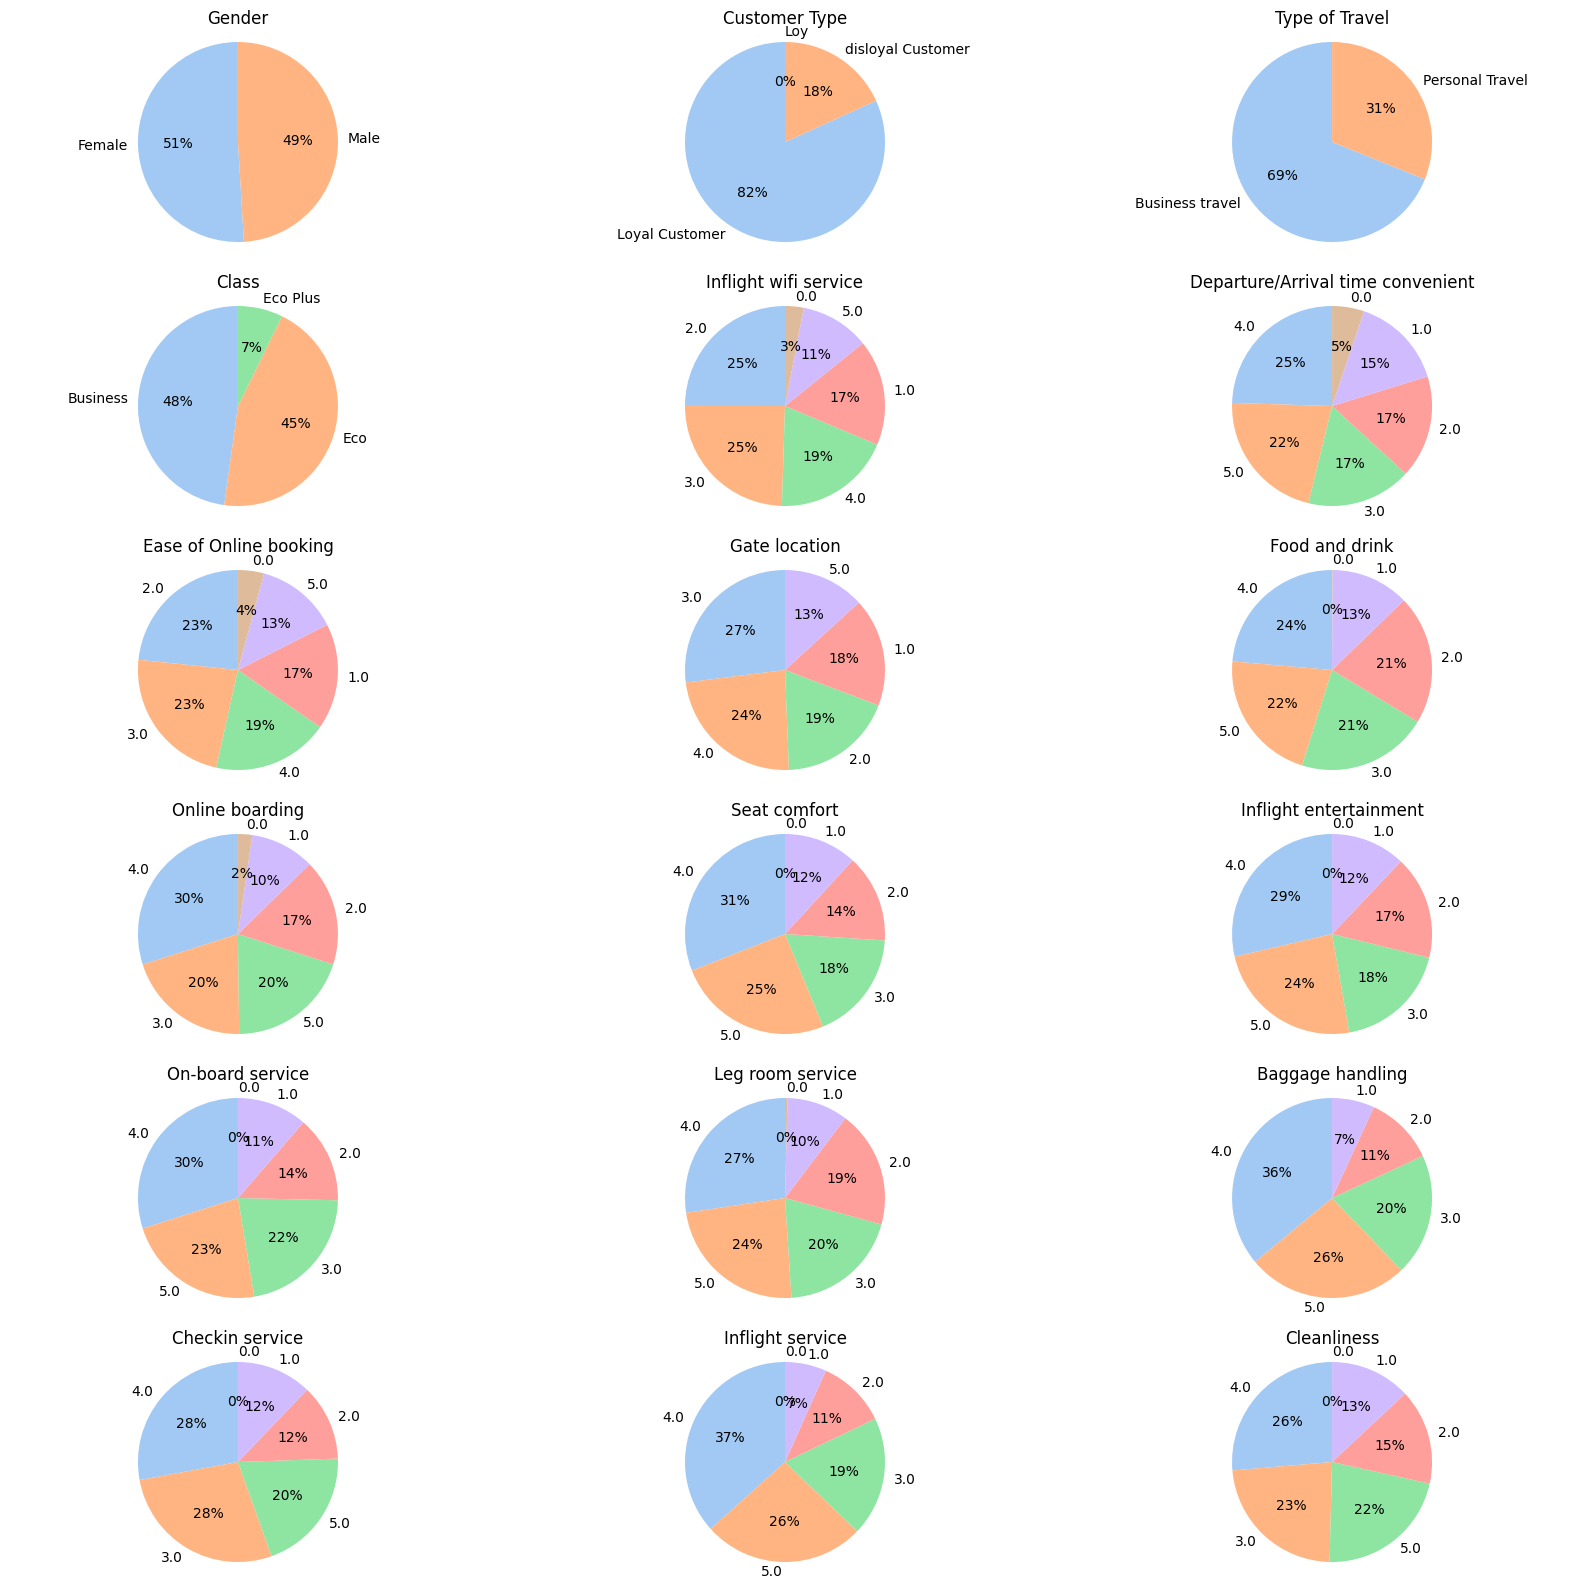

In [30]:
cat = df.iloc[:,categorical_indexes] #select cat_columns
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(cat):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("pastel"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Some conclusions about the considered sample
-The number of men and and the number of women are almost equal.
- Many of the Customers are loyal.
- Business travel is more popular than personal travel.
*Business and Economy are the most popular classes than Eco Plus.
*People have mixed kind of reviews regarding most of the other facilites.

Now let's look at a few "boxes with whiskers" (box diagrams).


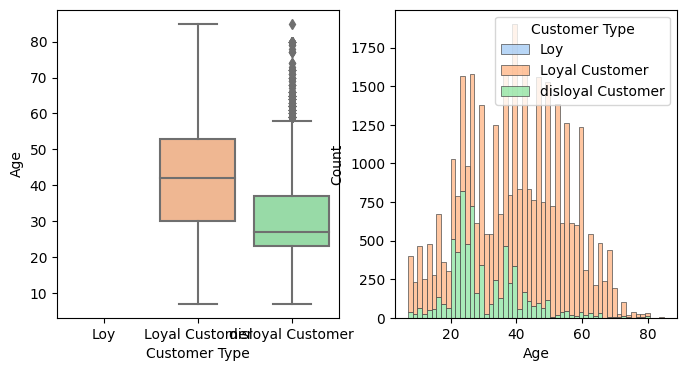

In [31]:
f, ax = plt.subplots(1, 2, figsize = (8,4))
sns.boxplot(x = "Customer Type", y = "Age", palette = "pastel", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "pastel", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

From box diagram we can conclude two things
- Most of the airline's regular customers are between the ages of 30 and 50
- The age range of non-regular customers is slightly smaller (from 25 to 40 years old)

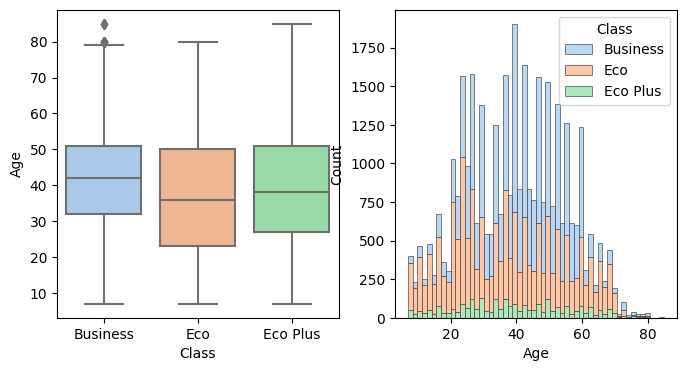

In [32]:
f, ax = plt.subplots(1, 2, figsize = (8,4))
sns.boxplot(x = "Class", y = "Age", palette = "pastel", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "pastel", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

On average, It can be seen that the age range of those customers which travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this, it can be assumed that regular customers mainly buy business class.

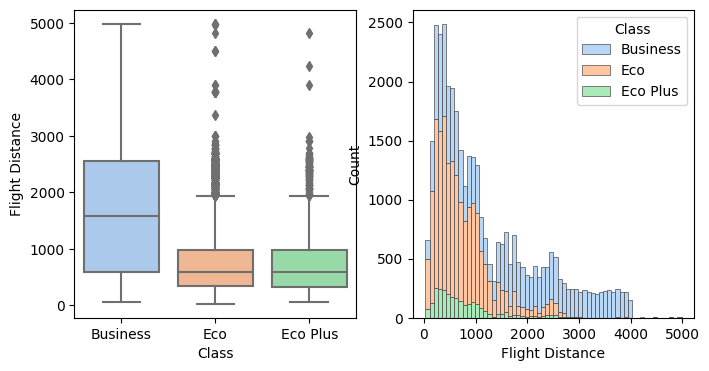

In [33]:
f, ax = plt.subplots(1, 2, figsize = (8,4))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "pastel", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "pastel", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

From this box diagram, the conclusion can be drawn:
- customers whose flight distance is long, mostly fly in business class.

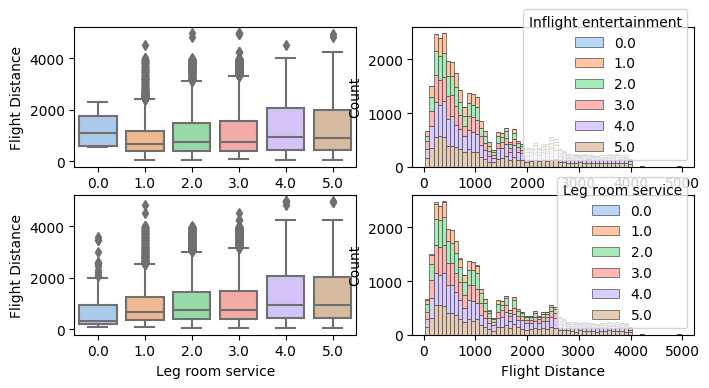

In [34]:
f, ax = plt.subplots(2, 2, figsize = (8,4))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "pastel", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "pastel", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "pastel", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "pastel", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

The following pattern can be seen:
- the more distance an aircraft passenger travels, the more they are satisfied with the entertainment in flight and the extra legroom (on average).

Now consider the dependence graphs of some categorical features on the target - satisfaction of air passengers:

According to this graph, we can see that almost all passengers who rated the wifi service 5 out of 5 points were satisfied with the flight.

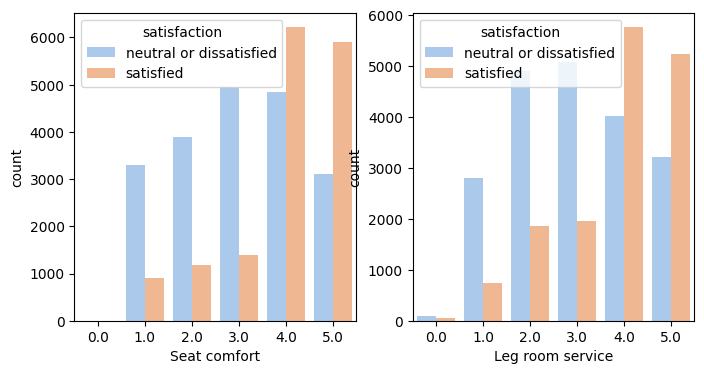

In [35]:
f, ax = plt.subplots(1, 2, figsize = (8,4))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "pastel", data = df,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "pastel", data = df, ax = ax[1])
plt.show()

From the graphs above, we can conclude the following:
- <b>Most passengers who rated the comfort of the seats and the extra legroom at 4 and 5 points out of 5 were satisfied with the flight.</b>

We will drop arrival delay column since it is basically the same as Departure delay.



In [36]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [37]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,neutral or dissatisfied
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,neutral or dissatisfied
2,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,satisfied
3,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,neutral or dissatisfied
4,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,satisfied


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35700 entries, 0 to 35826
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             35700 non-null  category
 1   Customer Type                      35700 non-null  category
 2   Age                                35699 non-null  float64 
 3   Type of Travel                     35699 non-null  category
 4   Class                              35699 non-null  category
 5   Flight Distance                    35699 non-null  float64 
 6   Inflight wifi service              35699 non-null  category
 7   Departure/Arrival time convenient  35699 non-null  category
 8   Ease of Online booking             35699 non-null  category
 9   Gate location                      35699 non-null  category
 10  Food and drink                     35699 non-null  category
 11  Online boarding                    35699 

In [39]:
df.rename(columns={'Customer Type':'Customer_Type','Type of Travel':'Type_of_Travel','Flight Distance':'Flight_Distance','Inflight wifi service':'Inflight_wifi_service','Departure/Arrival time convenient':'Departure/Arrival_time_convenient','Ease of Online booking':'Ease_of_Online_booking','Gate location':'Gate_location','Food and drink':'Food_and_drink','Online boarding':'Online_boarding','Seat comfort':'Seat_comfort','Inflight entertainment':'Inflight_entertainment','Leg room service':'Leg_room_service','Baggage handling':'Baggage_handling','Checkin service':'Checkin_service','Inflight service':'Inflight_service','Departure Delay in Minutes':'Departure_Delay_in_Minutes', 'On-board service':'On_board_service'},inplace=True)


In [40]:
df.head(2)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,neutral or dissatisfied
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,neutral or dissatisfied


In [41]:
df.Gender.unique()
#with the purpose of changing gender values from categorical to numerical, checking the unique values in Gender Column

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [42]:
df.Gender = df.Gender.replace({ 'Male': 1, 'Female': 0})
#changing gender into numerical variable as
#male=1 and female =0

In [43]:
df.Customer_Type.unique()
#checking the unique values in Customer_type column

['Loyal Customer', 'disloyal Customer', 'Loy']
Categories (3, object): ['Loy', 'Loyal Customer', 'disloyal Customer']

In [44]:
df.Customer_Type = df.Customer_Type.replace({ 'Loyal Customer': 1, 'disloyal Customer': 0})
#changing the values from categorical to numerical
# loyal customer =1  and diloyal custormer = 0

In [45]:
df.Type_of_Travel.unique()
#checking unique in Type_of_Travel

['Personal Travel', 'Business travel', NaN]
Categories (2, object): ['Business travel', 'Personal Travel']

In [46]:
df.Type_of_Travel = df.Type_of_Travel.replace({ 'Personal Travel': 0, 'Business travel': 1})
#Changing categorical values to  numerical
#Personal Travel=0 and Business Travel =1

In [47]:
df.Class.unique()
#checking unique in Class values

['Eco Plus', 'Business', 'Eco', NaN]
Categories (3, object): ['Business', 'Eco', 'Eco Plus']

In [48]:
df.Class = df.Class.replace({ 'Business': 1, 'Eco Plus': 2,'Eco': 0})
#changing categorical to numerical
#Busness class travel =1, eco economy=0, and eco plus class =2

In [49]:
df.satisfaction.unique()
#checking  unique in satisfaction

array(['neutral or dissatisfied', 'satisfied', nan], dtype=object)

In [50]:
df.satisfaction = df.satisfaction.replace({ 'neutral or dissatisfied': 0, 'satisfied': 1})
#changing categorical values to numerical
#neutral or dissatidfied = 0 and satisfied =1

In [51]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,1,1,13.0,0,2,460.0,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,0.0
1,1,0,25.0,1,1,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,0.0
2,0,1,26.0,1,1,1142.0,2.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0
3,0,1,25.0,1,1,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,0.0
4,1,1,61.0,1,1,214.0,3.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,1.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35700 entries, 0 to 35826
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             35700 non-null  category
 1   Customer_Type                      35700 non-null  category
 2   Age                                35699 non-null  float64 
 3   Type_of_Travel                     35699 non-null  category
 4   Class                              35699 non-null  category
 5   Flight_Distance                    35699 non-null  float64 
 6   Inflight_wifi_service              35699 non-null  category
 7   Departure/Arrival_time_convenient  35699 non-null  category
 8   Ease_of_Online_booking             35699 non-null  category
 9   Gate_location                      35699 non-null  category
 10  Food_and_drink                     35699 non-null  category
 11  Online_boarding                    35699 

In [133]:
df = df.dropna()

In [134]:
numerical_indexes = list(range(0, 20))

In [135]:
# Replace non-numeric values with NaN
df.iloc[:, numerical_indexes] = df.iloc[:, numerical_indexes].apply(pd.to_numeric, errors='coerce')

In [136]:
df.iloc[:,numerical_indexes] = df.iloc[:,numerical_indexes].astype('int64')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35699 entries, 0 to 35825
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             35699 non-null  int64  
 1   Customer_Type                      35699 non-null  int64  
 2   Age                                35699 non-null  int64  
 3   Type_of_Travel                     35699 non-null  int64  
 4   Class                              35699 non-null  int64  
 5   Flight_Distance                    35699 non-null  int64  
 6   Inflight_wifi_service              35699 non-null  int64  
 7   Departure/Arrival_time_convenient  35699 non-null  int64  
 8   Ease_of_Online_booking             35699 non-null  int64  
 9   Gate_location                      35699 non-null  int64  
 10  Food_and_drink                     35699 non-null  int64  
 11  Online_boarding                    35699 non-null  int

In [138]:
from sklearn.model_selection import train_test_split


In [139]:
X = df.drop('satisfaction', axis =1)
y = df['satisfaction']

In [140]:
#print(X)
print(y)

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
35821    0.0
35822    1.0
35823    0.0
35824    1.0
35825    0.0
Name: satisfaction, Length: 35699, dtype: float64


In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [143]:
print(y_train)

10960    1.0
27797    1.0
35688    1.0
17147    1.0
34769    0.0
        ... 
16898    0.0
6285     0.0
11317    0.0
861      1.0
15841    0.0
Name: satisfaction, Length: 28559, dtype: float64


#ML

In [63]:
# KNN Classifier Built-in
KNN_Model = KNeighborsClassifier(n_neighbors=10)
KNN_Model.fit(X_train, y_train)
KNN_Predictions = KNN_Model.predict(X_test)
print(accuracy_score(y_test,KNN_Predictions))

0.7224089635854342


# Generate and print confusion matrix


In [65]:
'''import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# KNN Classifier Built-in
KNN_Model = KNeighborsClassifier(n_neighbors=10)
KNN_Model.fit(X_train, y_train)
KNN_Predictions = KNN_Model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, KNN_Predictions)
print("Accuracy of KNN Classifier:", accuracy)'''

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, KNN_Predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3351  644]
 [1338 1807]]


#Calculate precision, recall, and F1 score

In [66]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, KNN_Predictions)
print("Precision:", precision)

Precision: 0.7372501019991841


In [67]:
recall = recall_score(y_test, KNN_Predictions)
print("Recall:", recall)

Recall: 0.5745627980922099


In [68]:
f1 = f1_score(y_test, KNN_Predictions)
print("F1 Score:", f1)

F1 Score: 0.6458184417441029



# Plot confusion matrix



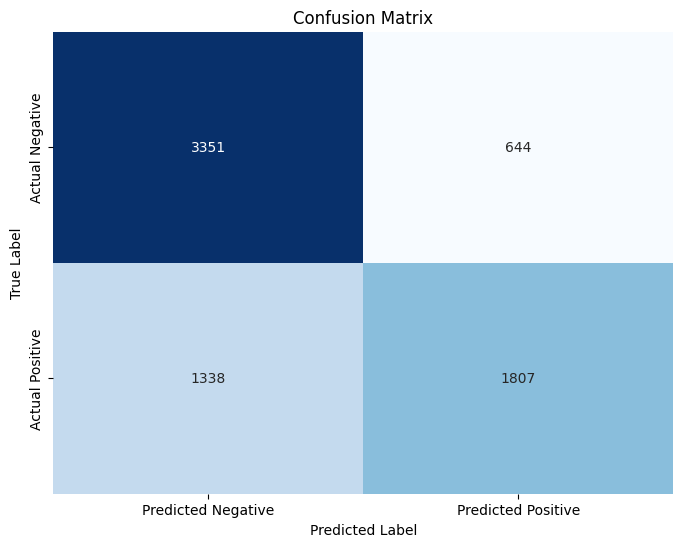

In [69]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## New KNN Model

In [70]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return predictions

    def _predict(self, x):
        # Compute distances using NumPy vectorized operations
        distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))

        # Get indices of k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extract labels of k-nearest neighbors
        k_nearest_labels = self.y_train[k_indices]

        # Find the most common label among the k-nearest neighbors
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]

        return most_common_label

In [76]:
our_knn_model = KNN(k=10)

In [77]:
our_knn_model.fit(X_train.values, y_train.values)

In [78]:
our_knn_predictions = our_knn_model.predict(X_test.values)

In [79]:
print(accuracy_score(y_test,ramzan_knn_predictions))

0.7299719887955182


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Naive Bayes Built-in
NB_Model = GaussianNB()
NB_Model.fit(X_train, y_train)
NB_Predictions = NB_Model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, NB_Predictions)
print("Accuracy of Naive Bayes Built-in Classifier:", accuracy)

Accuracy of Naive Bayes Built-in Classifier: 0.8614845938375351


In [85]:
# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, NB_Predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[3612  383]
 [ 606 2539]]


In [86]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, NB_Predictions)
print("Precision:", precision)

Precision: 0.8689253935660507


In [87]:
recall = recall_score(y_test, NB_Predictions)
print("Recall:", recall)

Recall: 0.8073131955484897


In [88]:
f1 = f1_score(y_test, NB_Predictions)
print("F1 Score:", f1)


F1 Score: 0.8369869787374321


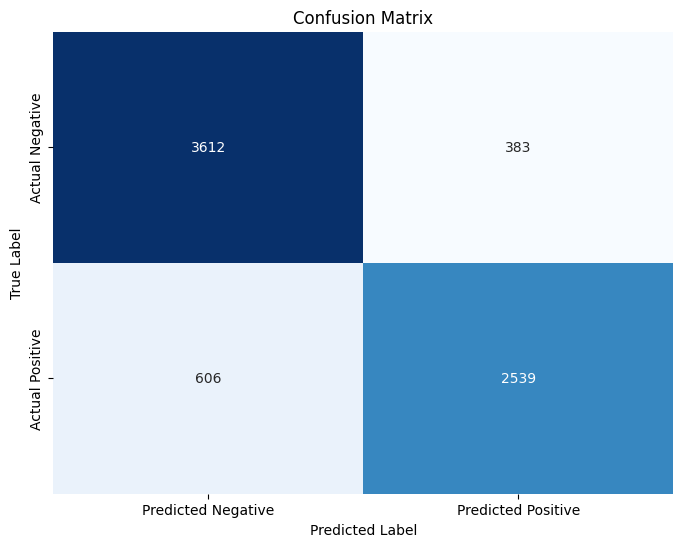

In [89]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes

In [90]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [91]:
# Naive Bayes
my_naivebayes = NaiveBayes()
my_naivebayes.fit(X_train.values, y_train.values)
predictions_my_naivebayes = my_naivebayes.predict(X_test.values)

print("Naive Bayes classifiar accuracy is ", accuracy_score(y_test, predictions_my_naivebayes))

Naive Bayes classifiar accuracy is  0.8620448179271709


In [144]:
# Decision Tree Built-in
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predictions = DT_Model.predict(X_test)
print("Accuracy of Decision Tree Built-in Classifier", accuracy_score(y_test, DT_Predictions))

Accuracy of Decision Tree Built-in Classifier 0.9358543417366947


In [145]:
# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, DT_Predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3773  222]
 [ 236 2909]]


In [146]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, DT_Predictions)
print("Precision:", precision)

Precision: 0.9290961354199936


In [147]:
recall = recall_score(y_test, DT_Predictions)
print("Recall:", recall)

Recall: 0.9249602543720191


In [148]:
f1 = f1_score(y_test, DT_Predictions)
print("F1 Score:", f1)


F1 Score: 0.9270235818992989


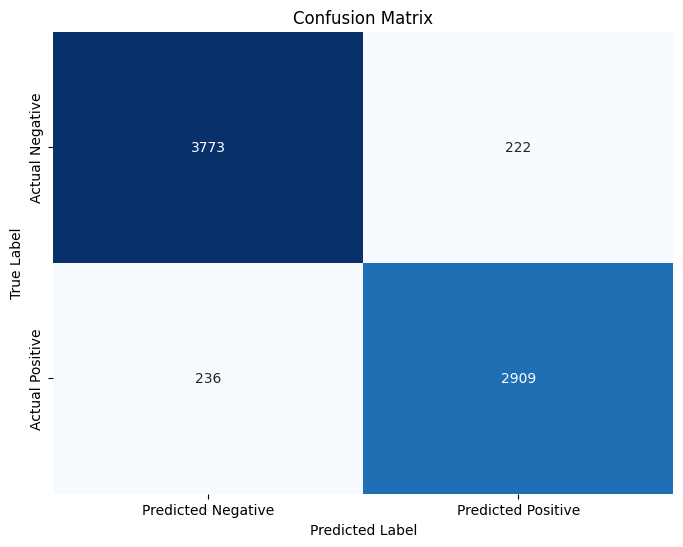

In [149]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Decision Tree

In [115]:
#df.iloc[:, numerical_indexes] = df.iloc[:, numerical_indexes].astype('int64')


In [150]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # checking the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # creating children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avgerage entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [157]:
# Decision Tree
my_decisiontree = DecisionTree(max_depth=20)

In [159]:
print(X_train.values.dtype)
print(y_train.values.dtype)


float64
float64


In [164]:
y_train = y_train.astype('int64')

In [165]:
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum())


0
0


In [166]:
X_train = X_train.astype('float64')


In [167]:
my_decisiontree.fit(X_train.values, y_train.values)

In [168]:
predictions_my_decisiontree = my_decisiontree.predict(X_test.values)


In [169]:
print("Accuracy of Decision Tree classification", accuracy_score(y_test, predictions_my_decisiontree))

Accuracy of Decision Tree classification 0.9362745098039216
